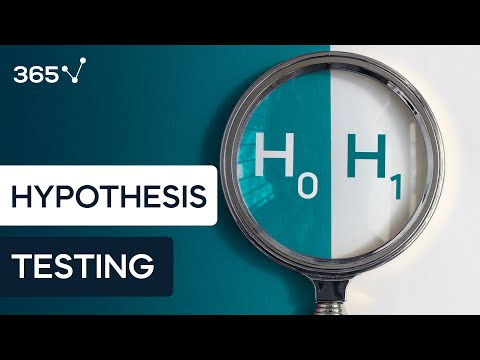

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

Notes: Steps in data-driven decision making:
1. Formulate a hypothesis
2. Find the right test
3. Execute the test
4. Make a decision

Hypothesis: An idea that can be tested.



Question 2: We want to explain the following sentence, ""It is important to note that outcomes of tests refer to the population parameter, rather than the sample statistic! As such, the result that we get is for the population."
To begin, let us split this sentence into two sections, one section focusing on population and one on sample. We'll start with sample statistics first. When we conduct a multitude of tests in any manner, it is practically impossible to survey the entire population, so instead we work with specific samples and make hypotheses about the population from those samples. So for example, take the salary example provided in the video. Imagine they ask 10 data-scientists about their salary and determine a mean from that. That is a specific sample mean generated from a particular sample of the population. Now imagine we conduct that experiment 1000 more times, and take the mean of all the specific sample means, this provides with an overall sample mean. Now this is where the distinction in the sentence takes place, when making a hypothesis, while we use the overall sample mean, it is representative of the population, not specific samples. That is typically the main point of taking an overall sample mean, since we cannot determine the actual mean of the population, so taking an overall sample mean is the next best alternative.

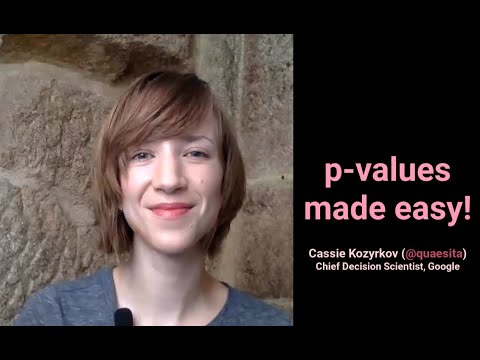

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

Imagine some experiment is conducted, providing us with something adjacent to a normal distribution, represting the sample means. Now we begin by supposing the null hypothesis is true. Now take some observed sample mean and determine it's place in the normal distribution. From here, we can determine the p-value. Now suppose that this p-value is very low, how does it make the null hypothesis look "ridiculous". The null hypothesis varies it's specific meaning, but it general it implies that there has been no effect in the two things your comparing. If we have an observed test statistic with a p value of 0.02, then the likelihood of getting such a value assuming the null hypothesis is quite unlikely. Since it's very unlikely, we can say that there's enough evidence to suggest that since the possibility of this observed statistic is quite low assuming the null hypothesis, we can reject the hypothesis. To be clear, this doesn't mean the null hypothesis isn't true, just that's its unlikely. This works into the concept of it being "ridiciulous", if you have a very low p-value (0.001), then it's quite ridiculous to assume the null hypothesis since it's very unlikely to get such a statistic. 

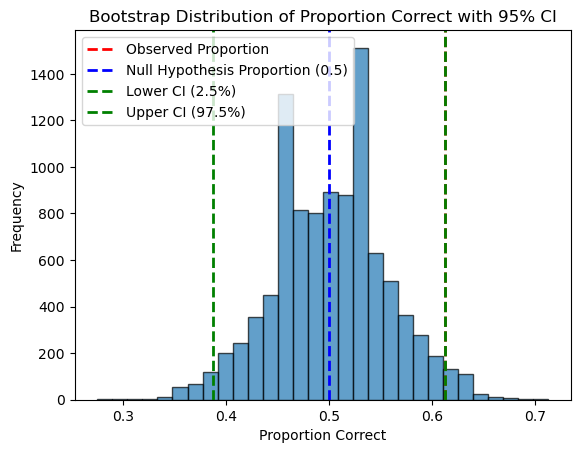

Observed proportion of correct identifications: 0.6125
p-value from bootstrap test: 0.0441
95% confidence interval for the proportion: [0.3875, 0.6125]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Experiment data
n_students = 80
n_correct = 49
observed_proportion = n_correct / n_students
null_hypothesis_proportion = 0.5

# Number of bootstrap simulations
n_simulations = 10000

# Perform bootstrapping under the null hypothesis (students are guessing, p=0.5)
bootstrap_proportions = np.random.binomial(n_students, null_hypothesis_proportion, n_simulations) / n_students

# Calculate the p-value (two-tailed test)
p_value = np.sum(np.abs(bootstrap_proportions - null_hypothesis_proportion) >= np.abs(observed_proportion - null_hypothesis_proportion)) / n_simulations

# Calculate the 95% confidence interval using the bootstrap samples (percentile method)
confidence_interval = np.percentile(bootstrap_proportions, [2.5, 97.5])

# Plot the bootstrap distribution
plt.hist(bootstrap_proportions, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_proportion, color='red', linestyle='dashed', linewidth=2, label='Observed Proportion')
plt.axvline(null_hypothesis_proportion, color='blue', linestyle='dashed', linewidth=2, label='Null Hypothesis Proportion (0.5)')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='Lower CI (2.5%)')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='Upper CI (97.5%)')
plt.title('Bootstrap Distribution of Proportion Correct with 95% CI')
plt.xlabel('Proportion Correct')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the results
print(f"Observed proportion of correct identifications: {observed_proportion:.4f}")
print(f"p-value from bootstrap test: {p_value:.4f}")
print(f"95% confidence interval for the proportion: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")



Introduction:
    To begin, this experiment follows Fisher's Tea Experiment. A sample of students are given a cup of tea, and are asked to
    identify whether the tea or milk was poured in first. The purpose is to determine whether if there is actually a difference 
    in taste between pouring the milk or tea first. The main difference between the two experiments is that our experiment works 
    with a much larger number of people, while the original only had one person
    In terms of the null-hypothesis and alternative hypothesis, we have the two following statements.
    1. The null hypothesis is true, and people are randomly guessing. This would provide a hypothesis of H0: p = 0.5. So
    in general, the population cannot tell the difference between which is poured first.
    2. The alternative hypothesis would be that people are not randomly guessing and there is some ability to tell the
    difference. This would imply, H1: p does not equal 0.5
    
Analysis:
    The code above using bootstrapping (from the original sample) to create a distribution representing the sample mean. We
    will take the observed sample mean of 49/80 (the original sample), which can be written at 0.6125. After determining the 
    confidence interval, we can determine which our observed sample mean is within the 95% confidence interval.
    As we can see, the observed sample mean is beyond the confidence interval, giving us enough evidence to reject the null
    hypothesis. 
    
Conclusion:
    Thus, we conclude that the null hypothesis can be rejected, and therefore can say we confidence (not certainty) that there 
    is a noticeable difference between pouring the milk or tea first. 

CHATGPT LINK: https://chatgpt.com/share/670f2014-7a84-8005-8adf-9a3e271a9d5f